<a href="https://colab.research.google.com/github/gabrield03/emotion_classification/blob/main/model/m1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv

--2024-05-17 02:15:35--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  53.4MB/s    in 0.3s    

2024-05-17 02:15:36 (53.4 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-05-17 02:15:36--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.207, 172.217.204.207, 172.217.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.207|:443... connected.
HTTP request sent, awaiting respo

In [ ]:
go1_df = pd.read_csv('data/full_dataset/goemotions_1.csv')
go2_df = pd.read_csv('data/full_dataset/goemotions_2.csv')
go3_df = pd.read_csv('data/full_dataset/goemotions_3.csv')

In [ ]:
go_df = pd.concat([go1_df, go2_df, go3_df]).reset_index(drop=True)
go_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [ ]:
go_df.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


### Data Preprocessing and Filtering  

- Drop unecessary columns
- Remove records with unclear text  
- Remove duplicate entries

In [ ]:
# Drop uncessary columns
go_df.drop(columns={'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id'}, inplace=True)

In [ ]:
# Remove unclear text
temp_df = go_df[go_df.example_very_unclear == False]
go_df = temp_df.drop(columns={'example_very_unclear'}).reset_index(drop=True)

In [ ]:
go_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
go_df.shape

(207814, 29)

In [ ]:
go_df.duplicated().sum()

56410

In [ ]:
go_df.drop_duplicates(subset=['text'], inplace=True)
go_df.duplicated().sum()

0

In [ ]:
go_df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Right? Considering it’s such an important docu...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
go_df.shape

(57730, 29)

In [ ]:
row_sums = go_df.iloc[:, 1:].sum(axis=1)

count_at_least_2 = (row_sums >= 2).sum()

print("Number of rows with a sum of at least 2:", count_at_least_2)

Number of rows with a sum of at least 2: 10244


In [ ]:
# Drop records with more than one emotion classification
# Sum the values in each row for the emotion columns (ignoring the text column)
row_sums = go_df.iloc[:, 1:].sum(axis=1)
rows_to_drop = row_sums >= 2

filtered_df = go_df[~rows_to_drop]

In [ ]:
filtered_df.shape

(47486, 29)

In [ ]:
go_df = filtered_df

In [ ]:
# Calculate max, mean, and median sentence lengths
maxLen = 0
sumLen = 0
word_length_list = []
count = 0

for text in go_df.text:
  # Check if text entry is a string
  if isinstance(text, str):
    words = text.split()
    maxLen = max(maxLen, len(words))
    sumLen += len(words)
    word_length_list.append(len(words))
  else:
    count += 1

meanLen = int(round(sumLen / len(go_df.text), 0))

# Sort to find the median
word_length_list.sort()
medianLen = word_length_list[len(go_df.text) // 2]

print(f'Max sentence len: {maxLen}')
print(f'Mean sentence len: {meanLen}')
print(f'Median sentence len: {medianLen}')

Max sentence len: 33
Mean sentence len: 13
Median sentence len: 12


### Check the balance of the data

In [ ]:
# Check balance/imbalance of data
for cols in go_df.iloc[:, 2:]:
  print(f'{cols}:'.ljust(18) + f'{go_df[cols].sum()}')

amusement:        1737
anger:            1428
annoyance:        2106
approval:         3091
caring:           930
confusion:        1351
curiosity:        1682
desire:           574
disappointment:   1200
disapproval:      2095
disgust:          714
embarrassment:    355
excitement:       807
fear:             469
gratitude:        2095
grief:            92
joy:              1172
love:             1420
nervousness:      205
optimism:         1234
pride:            179
realization:      1228
relief:           232
remorse:          394
sadness:          1006
surprise:         946
neutral:          15803


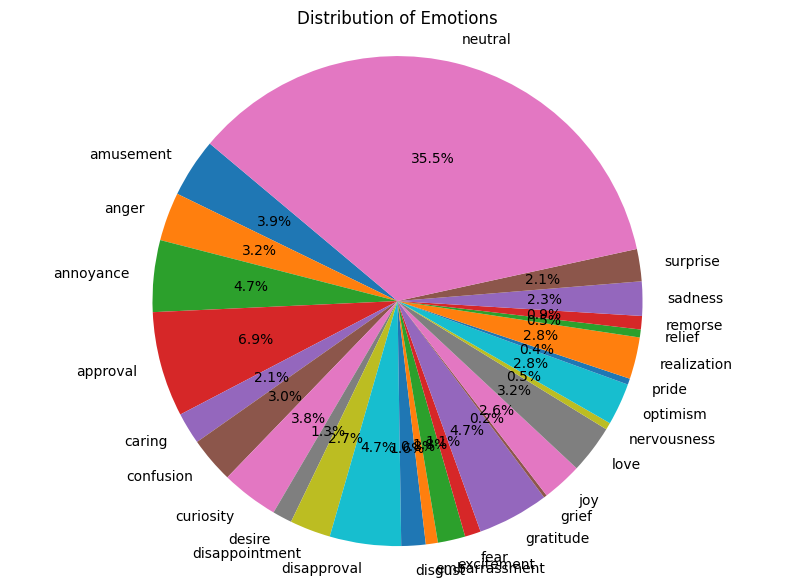

In [ ]:
# Plot the balance of the data
values = go_df.iloc[:, 2:].values

# Sum the values along the rows axis to get the total count for each emotion
emotion_counts = values.sum(axis=0)

emotion_labels = go_df.columns[2:]

plt.figure(figsize=(10, 7))
plt.pie(
    emotion_counts,
    labels=emotion_labels,
    autopct='%1.1f%%',
    startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal');

In [ ]:
# Combine the label columns (all emotions) into one column, 'emotion'
go_df2 = go_df.copy()

# Reshape the DataFrame using melt
melted_df = go_df2.melt(id_vars=['text'], var_name='emotion', value_name='value')

# Drop rows where Value is 0
melted_df = melted_df[melted_df['value'] == 1]

melted_df.drop(columns={'value'}, inplace=True)
melted_df.reset_index(drop=True, inplace=True)

melted_df

,text,emotion
0,Pretty much every Punjabi dude I've met.,admiration
1,"Lots, play store or apple store vpn. Nord is good",admiration
2,nice!! I'll try this one,admiration
3,She’s like a kewpie doll with them. Precious.,admiration
4,I loved how [NAME] feels like everyone in the ...,admiration
...,...,...
47481,Well when you’ve imported about a gazillion of...,neutral
47482,"If you ram it just right, you can ram it all n...",neutral
47483,_____ is ruining _____ because kids these days.,neutral
47484,I didn’t even notice that one. I noticed the b...,neutral


In [ ]:
go_df3 = melted_df.copy()
go_df3

,text,emotion
0,Pretty much every Punjabi dude I've met.,admiration
1,"Lots, play store or apple store vpn. Nord is good",admiration
2,nice!! I'll try this one,admiration
3,She’s like a kewpie doll with them. Precious.,admiration
4,I loved how [NAME] feels like everyone in the ...,admiration
...,...,...
47481,Well when you’ve imported about a gazillion of...,neutral
47482,"If you ram it just right, you can ram it all n...",neutral
47483,_____ is ruining _____ because kids these days.,neutral
47484,I didn’t even notice that one. I noticed the b...,neutral


In [ ]:
## Install tensorflow, if needed
# !pip install tensorflow --quiet

In [ ]:
# Import ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

import keras
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import layers

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

import re
import nltk
from tqdm import tqdm
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

### Encode the emotions

In [ ]:
lb = LabelEncoder()

go_df3['emotion'] = lb.fit_transform(go_df3['emotion'])
go_df3

,text,emotion
0,Pretty much every Punjabi dude I've met.,0
1,"Lots, play store or apple store vpn. Nord is good",0
2,nice!! I'll try this one,0
3,She’s like a kewpie doll with them. Precious.,0
4,I loved how [NAME] feels like everyone in the ...,0
...,...,...
47481,Well when you’ve imported about a gazillion of...,20
47482,"If you ram it just right, you can ram it all n...",20
47483,_____ is ruining _____ because kids these days.,20
47484,I didn’t even notice that one. I noticed the b...,20


In [ ]:
# Download stopwords and wordnet for stemming
tqdm.pandas()

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# text_cleaning approach - stemming
def text_cleaning(df, vocab_size, max_len):
  stemmer = PorterStemmer()
  corpus = []

  for text in df:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    cleaned_text = ' '.join(text)
    corpus.append(cleaned_text)

  one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
  pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')

  return pad

### Train, test, and validation splits

In [ ]:
X = go_df3['text']
y = go_df3['emotion']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.05, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [ ]:
X_tr = text_cleaning(X_train, 20000, 40)    # vocab size and max word len
X_train = X_tr

y_tr = to_categorical(y_train)
y_train = y_tr

X_v = text_cleaning(X_val, 20000, 40)    # vocab size and max word len
X_val = X_v

y_v = to_categorical(y_val)
y_val = y_v

In [ ]:
# Model 1
import tensorflow as tf

precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
f1_score = tf.keras.metrics.F1Score(average='weighted')

# Implement early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model1 = Sequential([
      Embedding(input_dim = 20000, output_dim = 150, input_length = 40),
      Dropout(0.01),
      LSTM(64, return_sequences=True),
      LSTM(64),
      Dense(64, activation = 'tanh'),
      Dense(64, activation = 'tanh'),
      Dropout(0.01),
      Dense(28, activation = 'softmax')
])

opt = keras.optimizers.Adam(learning_rate=0.001)

model1.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=[['accuracy'], precision, recall, f1_score])

# Save data in hist for plotting
hist = model1.fit(
    X_train, y_train,
    epochs = 10,
    batch_size = 64,
    validation_data = (X_val, y_val),
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/10
353/353 [==============================] - 92s 231ms/step - loss: 2.6096 - accuracy: 0.3530 - precision: 0.5744 - recall: 0.0197 - f1_score: 0.2111 - val_loss: 2.3522 - val_accuracy: 0.4055 - val_precision: 0.8751 - val_recall: 0.0360 - val_f1_score: 0.2727
Epoch 2/10
353/353 [==============================] - 63s 178ms/step - loss: 2.2042 - accuracy: 0.4274 - precision: 0.6114 - recall: 0.1877 - f1_score: 0.3136 - val_loss: 2.2128 - val_accuracy: 0.4327 - val_precision: 0.5776 - val_recall: 0.1718 - val_f1_score: 0.3244
Epoch 3/10
353/353 [==============================] - 77s 218ms/step - loss: 1.9480 - accuracy: 0.4673 - precision: 0.6676 - recall: 0.2808 - f1_score: 0.3777 - val_loss: 2.2442 - val_accuracy: 0.4221 - val_precision: 0.5503 - val_recall: 0.1905 - val_f1_score: 0.3367
Epoch 4/10
353/353 [==============================] - 61s 174ms/step - loss: 1.7102 - accuracy: 0.5281 - precision: 0.7167 - recall: 0.3371 - f1_score: 0.4784 - val_loss: 2.3329 - val_accuracy:

In [ ]:
 # Save the model for use
model1.save('lstm_model1.keras')

In [ ]:
# Load the model
from keras.models import load_model

m1_trained = load_model("lstm_model1.keras")

## Visualizations for the performance metrics

In [ ]:
# Save the metrics to a file
import pickle

with open('training_history_3.pkl', 'wb') as file:
    pickle.dump(hist.history, file)

In [ ]:
with open('training_history_3.pkl', 'rb') as file:
    history = pickle.load(file)

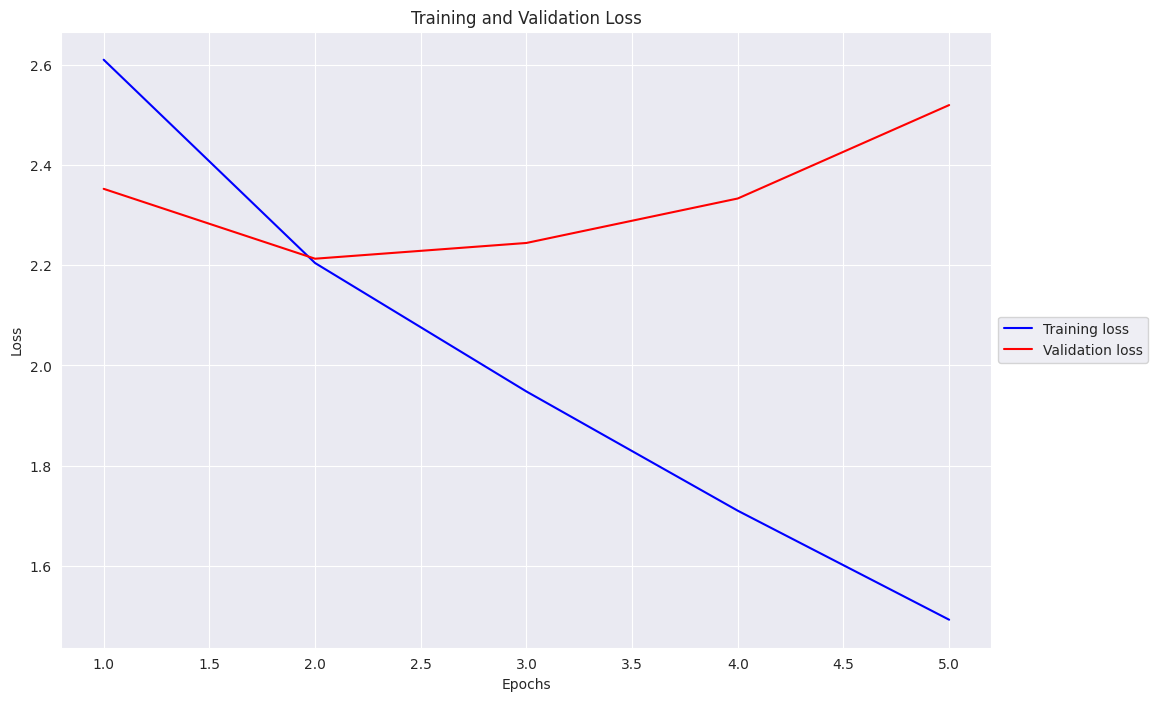

In [ ]:
# Plot the metrics
epochs = range(1, len(history['loss']) + 1)

sns.set_style("darkgrid")
plt.figure(figsize=(12, 8))

plt.plot(epochs, history['loss'], 'b', label='Training loss')
plt.plot(epochs, history['val_loss'], 'r', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
del history['loss']
del history['val_loss']

<Figure size 1200x800 with 0 Axes>

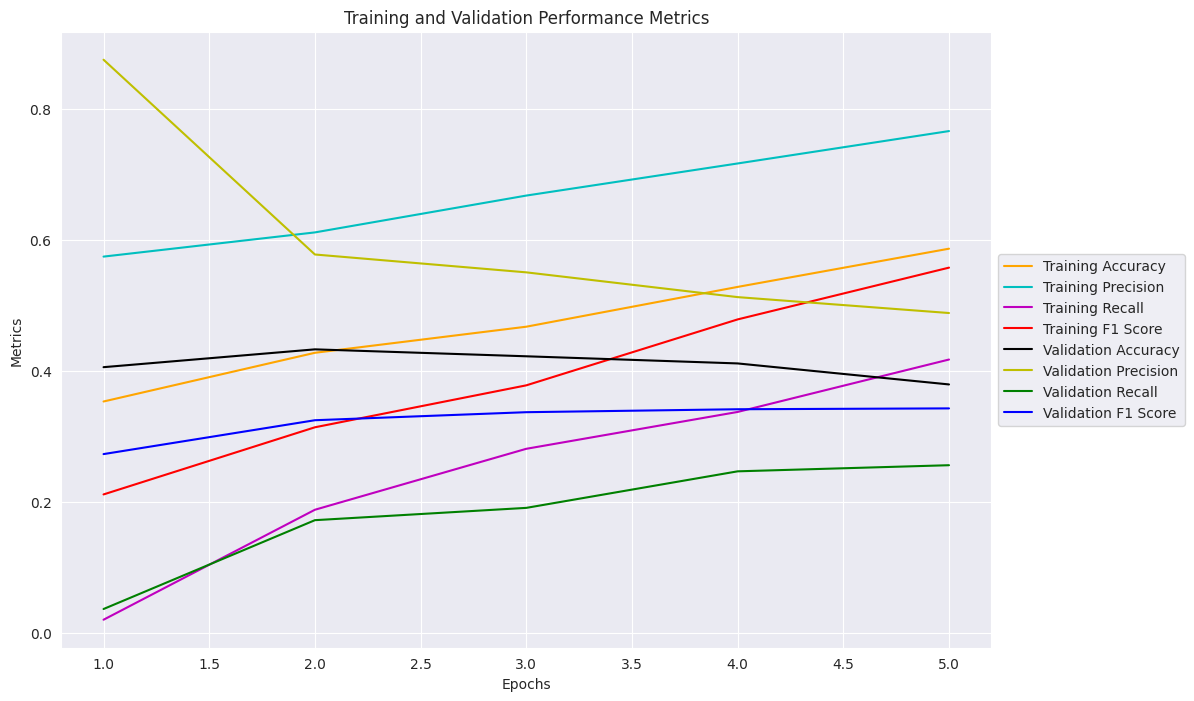

In [ ]:
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'y', 'k', 'r', 'm', 'c', 'orange']
plt.figure(figsize=(12, 8))

# Plot each metric from the history dictionary
for k, v in history.items():
    # Check if the metric contains 'val_'
    is_validation = 'val_' in k
    metric = ''

    if k[-1].isnumeric():
      metric = ' '.join(k.split('_')[:-1])
    else:
      metric = ' '.join(k.split('_'))


    # Construct the label based on whether it's a training or validation metric
    label = f'{"Validation" if is_validation else "Training"} {metric.title()}'

    if is_validation:
        label = 'Validation ' + ' '.join(metric.split(' ')[1:]).title()
    else:
        label = 'Training ' + metric.title()

    # Plot the metric with the corresponding color
    plt.plot(epochs, v, colors.pop(), label=label)

plt.title('Training and Validation Performance Metrics')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

## Evaluate the model against test data

In [ ]:
# Preprocess the test data
X_test_processed = text_cleaning(X_test, 20000, 40)
y_test_encoded = to_categorical(y_test)

In [ ]:
y_pred = model1.predict(X_test_processed)
y_pred_labels = np.argmax(y_pred, axis=1)

75/75 [==============================] - 3s 19ms/step


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model1.evaluate(X_test_processed, y_test_encoded, verbose=0)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')
print(f'Test F1-Score: {test_f1_score}')

Test Loss: 2.2114033699035645
Test Accuracy: 0.4362105131149292
Test Precision: 0.5908440351486206
Test Recall: 0.1738947331905365
Test F1-Score: 0.3253060579299927


## Binary Label Classification Performance Metrics  

- Treating each emotion as a binary classification problem might reveal better results..
- Steps:  
 1. Convert labels to binary
 2. Set the 0.5 threshold for pos/neg
 3. Calc metrics per label
 4. Maybe optimize thresholds for each emotion label

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

threshold = 0.5

y_pred_binary = (y_pred > threshold).astype(int)

accuracy_labels = {}
precision_labels = {}
recall_labels = {}
f1_labels = {}

# Loop over each emotion label
for i, emotion in enumerate(lb.classes_):
    accuracy_labels[emotion] = accuracy_score(y_test_encoded[:, i], y_pred_binary[:, i])
    precision_labels[emotion] = precision_score(y_test_encoded[:, i], y_pred_binary[:, i], zero_division=1, average='micro')
    recall_labels[emotion] = recall_score(y_test_encoded[:, i], y_pred_binary[:, i], zero_division=1, average='micro')
    f1_labels[emotion] = fbeta_score(y_test_encoded[:, i], y_pred_binary[:, i], beta=1, zero_division=1, average='micro')

print('Metrics per emotion:')
for emotion in lb.classes_:
    print(f'\tEmotion: {emotion}')
    print(f'\t\tAccuracy: {accuracy_labels[emotion]}')
    print(f'\t\tPrecision: {precision_labels[emotion]}')
    print(f'\t\tRecall: {recall_labels[emotion]}')
    print(f'\t\tF1 Score: {f1_labels[emotion]}')

Metrics per emotion:
	Emotion: admiration
		Accuracy: 0.9444210526315789
		Precision: 0.9444210526315789
		Recall: 0.9444210526315789
		F1 Score: 0.9444210526315789
	Emotion: amusement
		Accuracy: 0.9646315789473684
		Precision: 0.9646315789473684
		Recall: 0.9646315789473684
		F1 Score: 0.9646315789473684
	Emotion: anger
		Accuracy: 0.9701052631578947
		Precision: 0.9701052631578947
		Recall: 0.9701052631578947
		F1 Score: 0.9701052631578947
	Emotion: annoyance
		Accuracy: 0.9557894736842105
		Precision: 0.9557894736842105
		Recall: 0.9557894736842105
		F1 Score: 0.9557894736842105
	Emotion: approval
		Accuracy: 0.9347368421052632
		Precision: 0.9347368421052632
		Recall: 0.9347368421052632
		F1 Score: 0.9347368421052632
	Emotion: caring
		Accuracy: 0.9806315789473684
		Precision: 0.9806315789473684
		Recall: 0.9806315789473684
		F1 Score: 0.9806315789473684
	Emotion: confusion
		Accuracy: 0.9713684210526315
		Precision: 0.9713684210526315
		Recall: 0.9713684210526315
		F1 Score: 0.97

## Report on unique, made up, test data:  

- Show the model predictions vs actual labels

- If the prediction is a "positive" emotion and the label is a "positive" emotion, then mark as "close".  

- If it predicts a completely different category of emotion, mark it as wrong.

In [ ]:
go_df4 = melted_df.drop_duplicates(subset=['text'])

In [ ]:
go_enc = go_df4.copy()

lb = LabelEncoder()
go_enc['emotion'] = lb.fit_transform(go_enc['emotion'])

In [ ]:
enc_emotion_df = go_df4.merge(go_enc, on='text')
enc_emotion_df.rename(columns={'emotion_x': 'emotion_str', 'emotion_y': 'emotion_int'}, inplace=True)
enc_emotion_df.drop_duplicates(inplace=True)

enc_emotion_df

,text,emotion_str,emotion_int
0,Pretty much every Punjabi dude I've met.,admiration,0
1,"Lots, play store or apple store vpn. Nord is good",admiration,0
2,nice!! I'll try this one,admiration,0
3,She’s like a kewpie doll with them. Precious.,admiration,0
4,I loved how [NAME] feels like everyone in the ...,admiration,0
...,...,...,...
47481,Well when you’ve imported about a gazillion of...,neutral,20
47482,"If you ram it just right, you can ram it all n...",neutral,20
47483,_____ is ruining _____ because kids these days.,neutral,20
47484,I didn’t even notice that one. I noticed the b...,neutral,20


In [ ]:
# Get unique values of emotion_int and corresponding emotion_str
unique_emotions = enc_emotion_df[['emotion_int', 'emotion_str']].drop_duplicates()

# Create a dictionary mapping emotion_int to emotion_str
emotion_dict = dict(zip(unique_emotions['emotion_int'], unique_emotions['emotion_str']))

In [ ]:
for k, v in emotion_dict.items():
  print(k, v)

0 admiration
1 amusement
2 anger
3 annoyance
4 approval
5 caring
6 confusion
7 curiosity
8 desire
9 disappointment
10 disapproval
11 disgust
12 embarrassment
13 excitement
14 fear
15 gratitude
16 grief
17 joy
18 love
19 nervousness
21 optimism
22 pride
23 realization
24 relief
25 remorse
26 sadness
27 surprise
20 neutral


In [ ]:
emotion_category = {
    'positive': ['admiration', 'amusement', 'approval', 'caring', 'desire', 'excitement', 'joy', 'gratitude', 'love', 'optimism', 'pride', 'curiosity'],
    'negative': ['anger', 'annoyance', 'disapproval', 'disgust', 'fear', 'disappointment', 'grief', 'remorse', 'embarrassment', 'sadness', 'nervousness'],
    'ambiguous': ['confusing', 'realization', 'relief', 'surprise'],
    'neutral': ['neutral']
}

In [ ]:
emotion_map = {'positive': [], 'negative': [], 'ambiguous': [], 'neutral': []}

for emotion_int, emotion_str in emotion_dict.items():
    category = None
    for key, values in emotion_category.items():
        if emotion_str in values:
            category = key
            break
    if category:
        emotion_map[category].append(emotion_int)

emotion_map = {category: set(emotion_list) for category, emotion_list in emotion_map.items()}

In [ ]:
emotion_map

{'positive': {0, 1, 4, 5, 7, 8, 13, 15, 17, 18, 21, 22},
 'negative': {2, 3, 9, 10, 11, 12, 14, 16, 19, 25, 26},
 'ambiguous': {23, 24, 27},
 'neutral': {20}}

In [ ]:
correct_count = 0
nearly_correct_count = 0
incorrect_count = 0

for actual_label, predicted_label in zip(y_test, y_pred_labels):
    actual_category = None
    predicted_category = None

    for category, emotions in emotion_map.items():
        if actual_label in emotions:
            actual_category = category
        if predicted_label in emotions:
            predicted_category = category

    # Classify labels via the compairson
    if actual_label == predicted_label:
        classification = "correct label"
        correct_count += 1
    elif actual_category == predicted_category:
        classification = "nearly correct label"
        nearly_correct_count += 1
    else:
        classification = "incorrect label"
        incorrect_count += 1

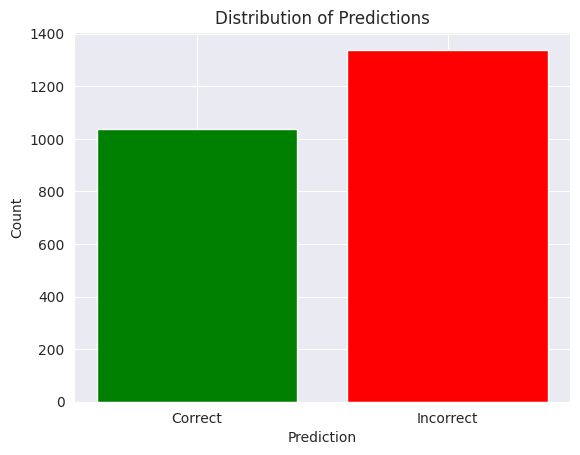

In [ ]:
# Plot the correct and incorrect predictions
labels = ['Correct', 'Incorrect']
counts = [correct_count, nearly_correct_count + incorrect_count]

plt.bar(
    labels,
    counts,
    color=['green', 'red']
)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Distribution of Predictions');

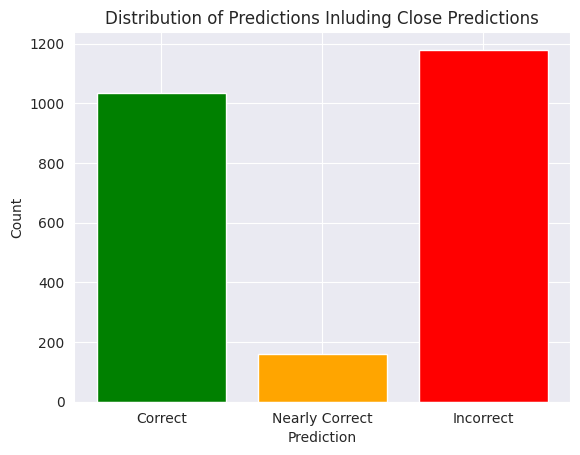

In [ ]:
# Plot the correct and incorrect predictions including "close" predictions
labels = ['Correct', 'Nearly Correct', 'Incorrect']
counts = [correct_count, nearly_correct_count, incorrect_count]

plt.bar(
    labels,
    counts,
    color=['green', 'orange', 'red']
)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Distribution of Predictions Inluding Close Predictions');

### Implementation of pre-trained model: BERT

In [ ]:
# !pip uninstall accelerate --> run if there are errors
!pip install transformers -U
!pip install accelerate>=0.21.0 -U
!pip install transformers[torch]

In [ ]:
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=28)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Create torch dataset
class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels=None):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings["input_ids"])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compute_metrics(test_results):
    predictions = test_results.predictions
    labels = test_results.label_ids

    accuracy = accuracy_score(labels, predictions.argmax(axis=1))

    precision = precision_score(labels, predictions.argmax(axis=1), average='weighted', zero_division=0)
    recall = recall_score(labels, predictions.argmax(axis=1), average='weighted', zero_division=0)
    f1 = f1_score(labels, predictions.argmax(axis=1), average='weighted', zero_division=0)

    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
### Runtime disconnecting in Colab when test_size > 0.1...
### Reduced the test size to accomodate

bert_df = go_df3.copy()

X_bert = list(bert_df["text"])
y_bert = list(bert_df["emotion"])

X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, y_bert, test_size=0.2,stratify=y_bert)
X_train_tokenized_bert = tokenizer(X_train_bert, padding=True, truncation=True, max_length=40)
X_test_tokenized_bert = tokenizer(X_test_bert, padding=True, truncation=True, max_length=40)

In [ ]:
train_dataset = Dataset(X_train_tokenized_bert, y_train_bert)
test_dataset = Dataset(X_test_tokenized_bert, y_test_bert)

In [ ]:
# Trainer
args = TrainingArguments(
    output_dir="output",
    num_train_epochs=10,
    per_device_train_batch_size=64
)
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=test_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

### Test set

In [ ]:
test_results = trainer.predict(test_dataset)

In [ ]:
test_metrics = compute_metrics(test_results)

In [ ]:
print('Test Accuracy:', test_metrics['accuracy'])
print('Test Precision:', test_metrics['precision'])
print('Test Recall:', test_metrics['recall'])
print('Test F1-Score:', test_metrics['f1'])

Test Accuracy: 0.06074963150136871
Test Precision: 0.1514556389435028
Test Recall: 0.06074963150136871
Test F1-Score: 0.011254065167903176


### Plot BERT performance vs custom model

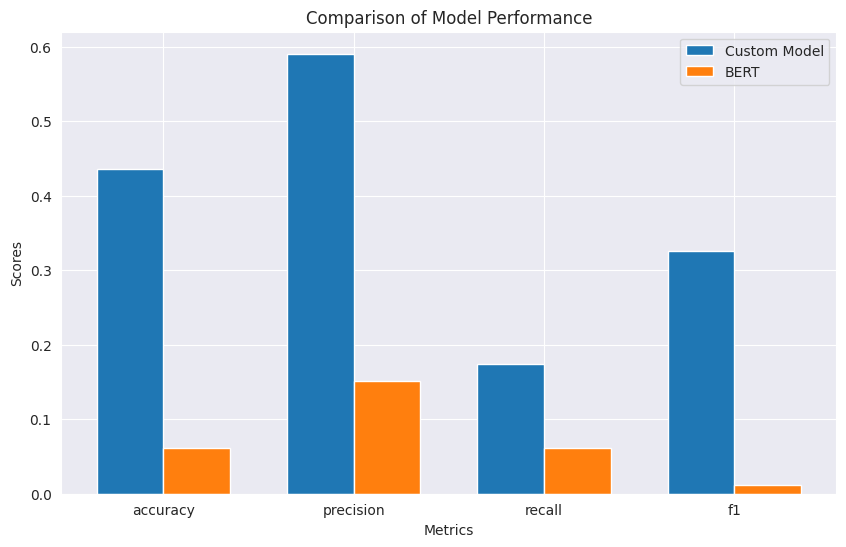

In [ ]:
import matplotlib.pyplot as plt

# Values for your custom model
custom_model_metrics = {
    "accuracy": test_accuracy,
    "precision": test_precision,
    "recall": test_recall,
    "f1": test_f1_score
}

# Values for the BERT model
bert_metrics = {
    "accuracy": test_metrics['accuracy'],
    "precision": test_metrics['precision'],
    "recall": test_metrics['recall'],
    "f1": test_metrics['f1']
}

metric_names = list(custom_model_metrics.keys())

custom_model_values = list(custom_model_metrics.values())
bert_values = list(bert_metrics.values())

x = range(len(metric_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, custom_model_values, width, label='Custom Model')
ax.bar([i + width for i in x], bert_values, width, label='BERT')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(metric_names)
ax.legend();